In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

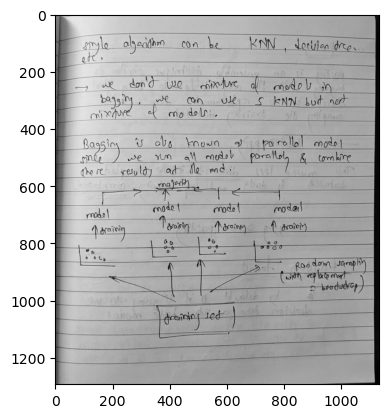

In [2]:
image = cv2.imread("../images/handwritten.jpeg", 0)

plt.imshow(image, cmap='grey')

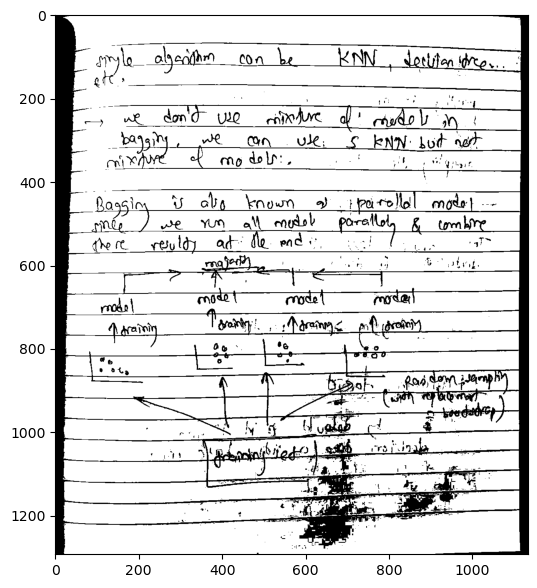

In [3]:
retval, binary = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12,7))

plt.imshow(binary, cmap='grey')
plt.show()

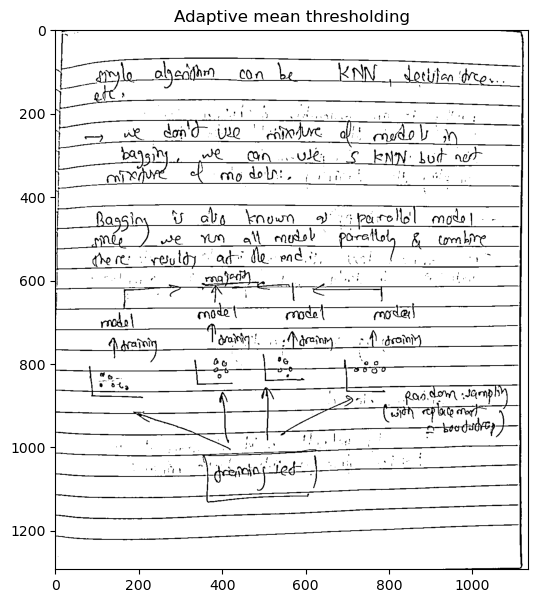

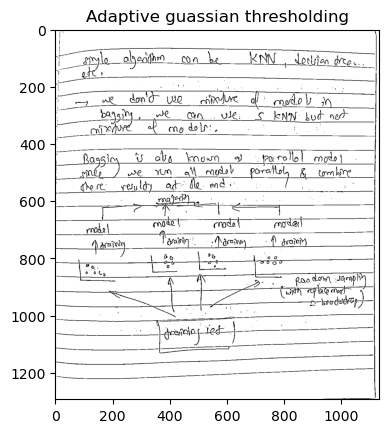

In [4]:
adaptive_m = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 15)

adaptive_g = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 15)

plt.figure(figsize=(12,7))

plt.imshow(adaptive_m, cmap='grey')
plt.title("Adaptive mean thresholding")
plt.show()

plt.imshow(adaptive_g, cmap='grey')
plt.title("Adaptive guassian thresholding")
plt.show()


In [5]:
image = cv2.imread("../images/shapes.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print(pixel_values)

[[255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 ...
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]]


In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3

_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [7]:
print(labels.shape)
print(centers)

(391876, 1)
[[ 70.9147   110.96521  167.68669 ]
 [255.2777   255.2192   255.20657 ]
 [249.43346  114.88152   69.147255]]


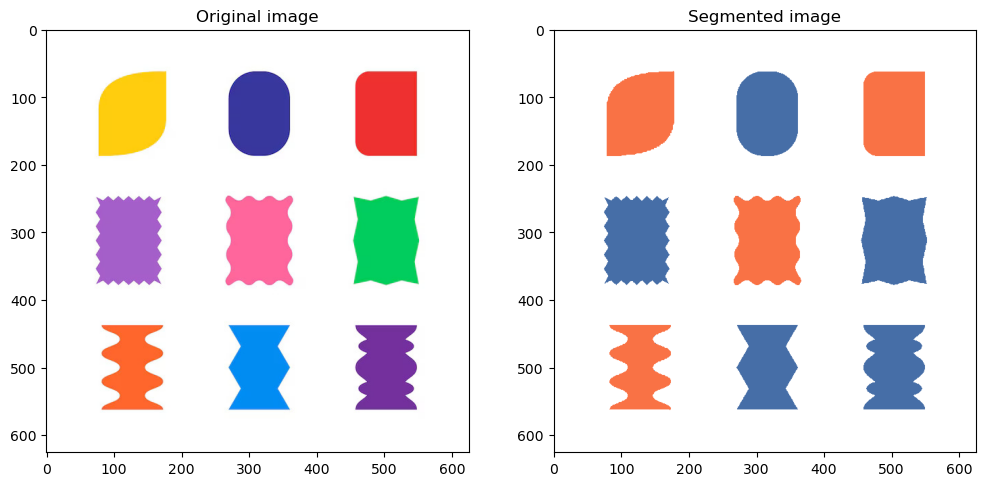

In [8]:
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# 1 --> [255, 255, 255]
# 0 --> [70,110, 167]

plt.figure(figsize=(12,7))

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title("Segmented image")

plt.show()

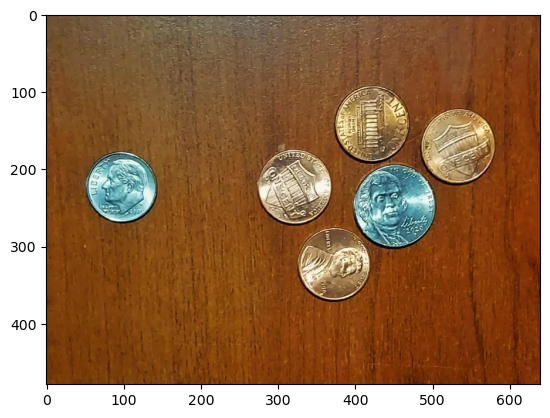

In [9]:
image = cv2.imread("../images/coin2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_image = image.copy()
plt.imshow(image)

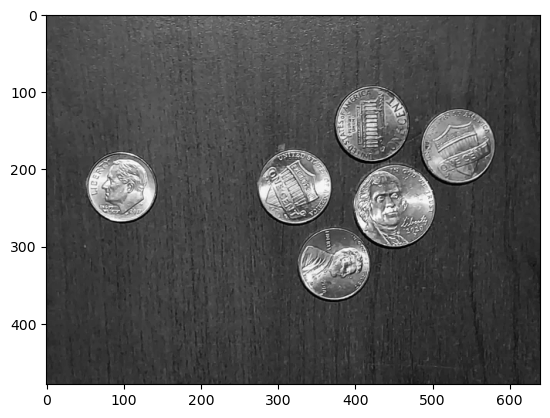

In [10]:
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grey, cmap='grey')

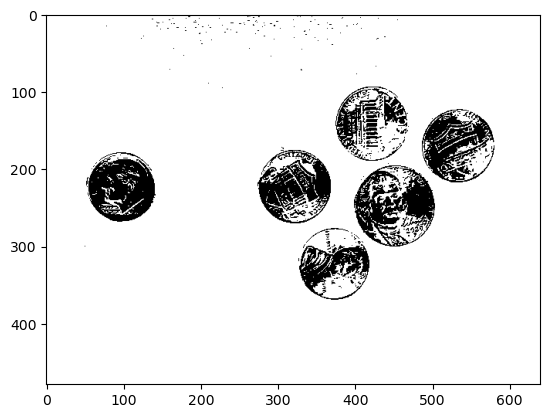

In [11]:
_, thresh = cv2.threshold(grey, 130, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap='grey')

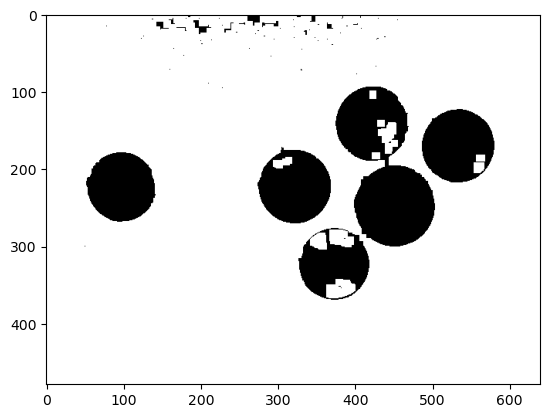

In [12]:
kernel = np.ones((3,3), np.uint8)
opeaning = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=4)

plt.imshow(opeaning, cmap='grey')

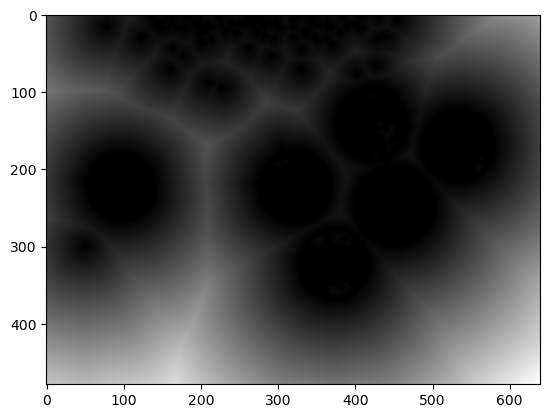

In [13]:
dist_transform = cv2.distanceTransform(opeaning, cv2.DIST_L2, 5)

plt.imshow(dist_transform, cmap='grey')